___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [7]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.drop("CustomerID", axis=1, inplace=True)

In [14]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [15]:
df.Gender.replace(["Male", "Female"], [0,1], inplace = True)

# map_dict={"Male":1, "Female":0}
# df["Gender"]=df["Gender"].map(map_dict)

In [16]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





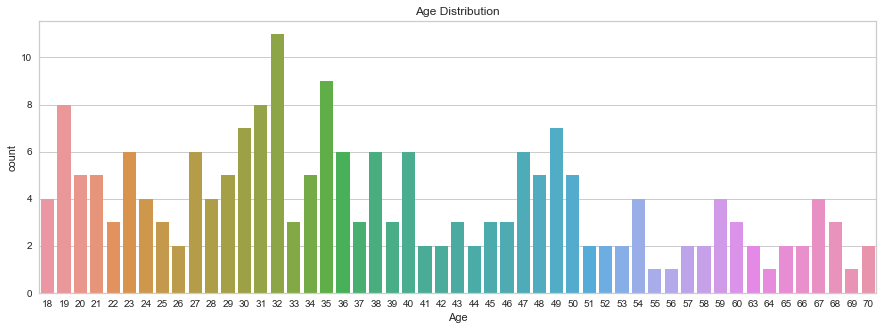

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

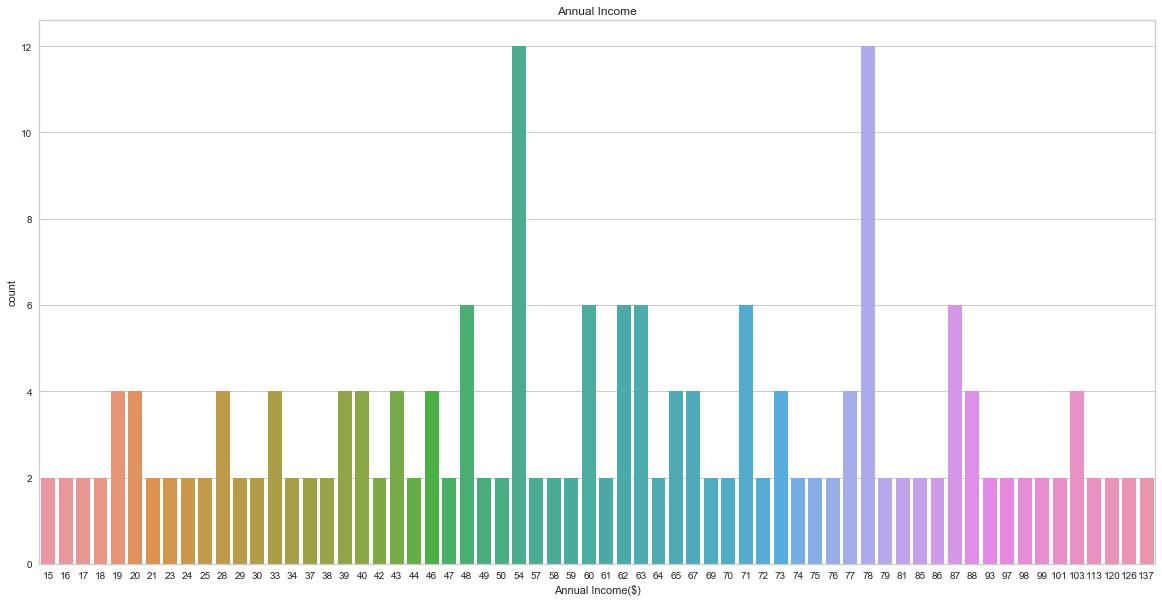

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

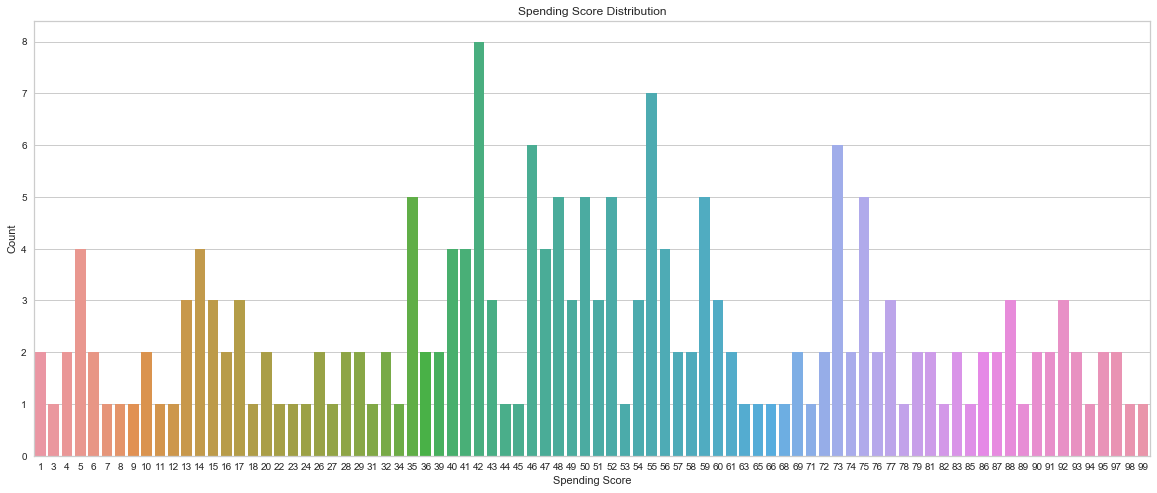

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(df['Spending_Score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show()

Text(0, 0.5, 'Count')

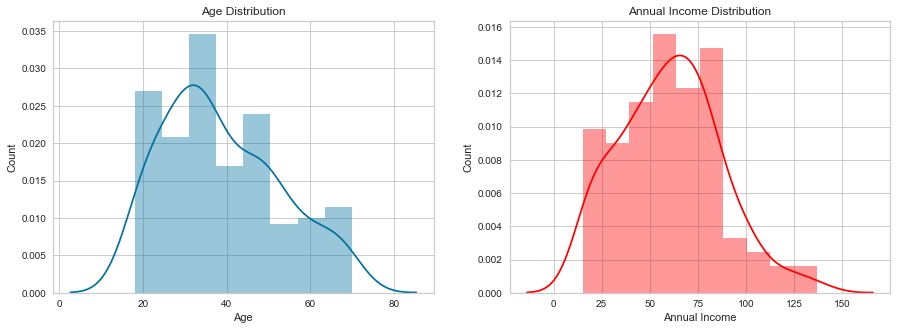

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

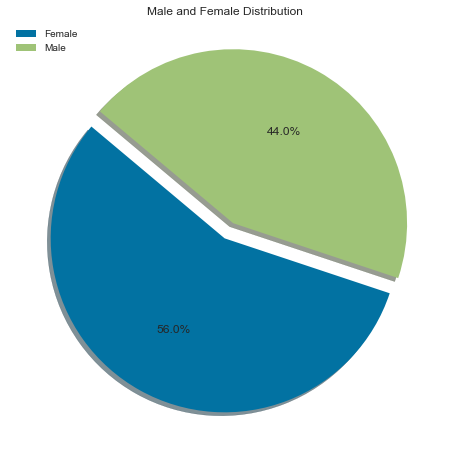

In [21]:
plt.figure(figsize=(8,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

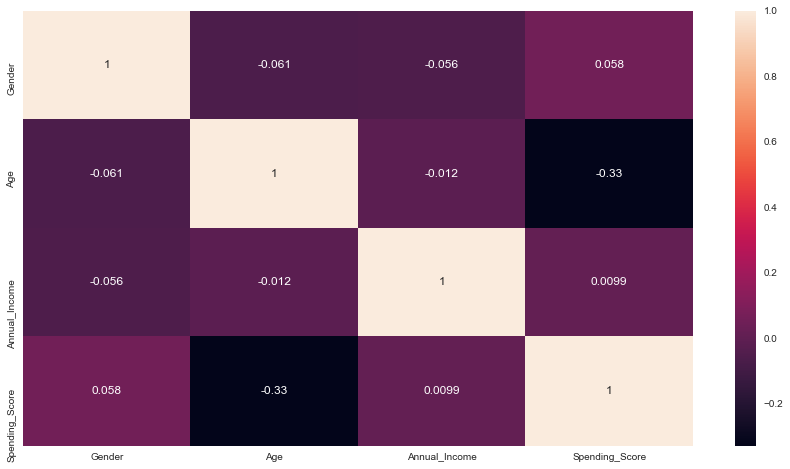

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

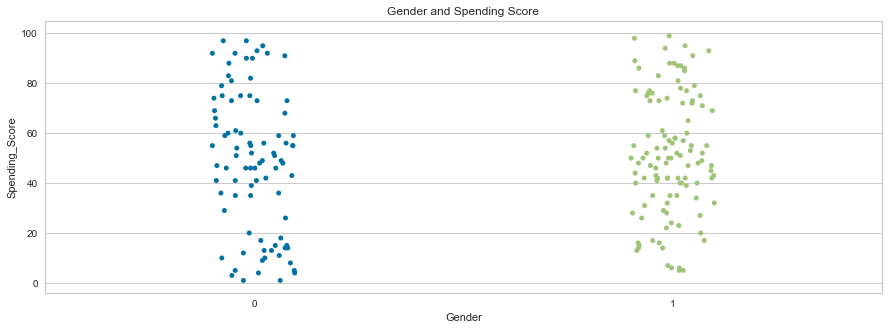

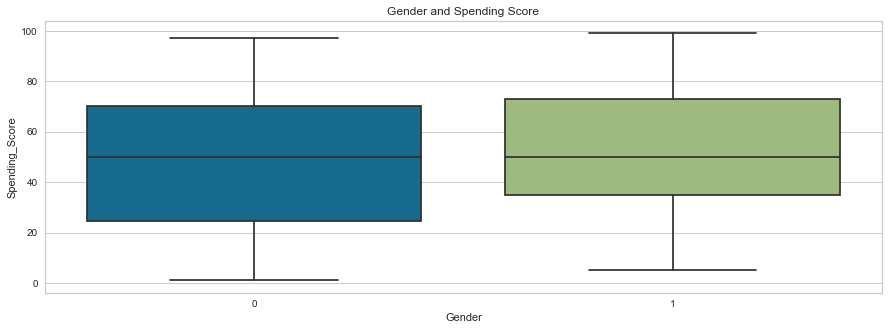

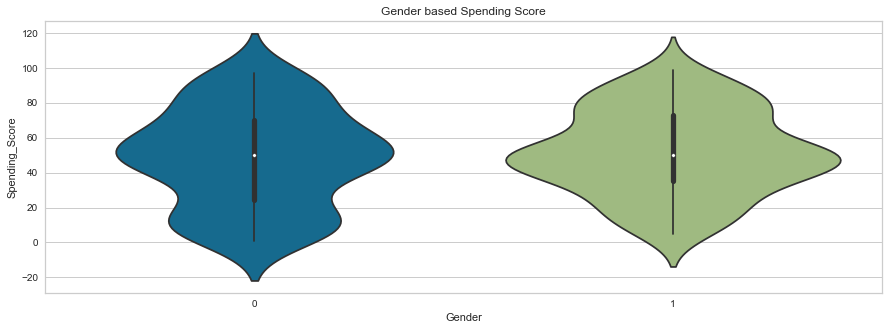

In [23]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Spending_Score'])
plt.title('Gender based Spending Score')
plt.show()

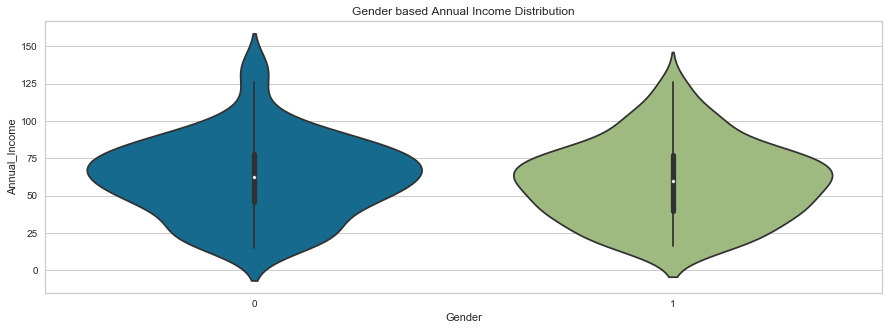

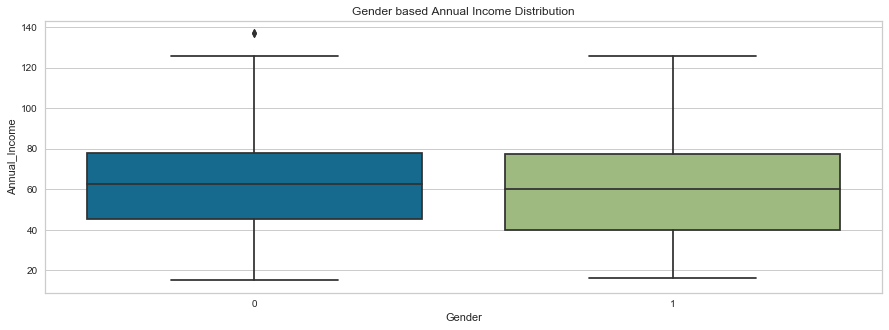

In [24]:
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Annual_Income'])
plt.title('Gender based Annual Income Distribution')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'],df['Annual_Income'])
plt.title('Gender based Annual Income Distribution')
plt.show()

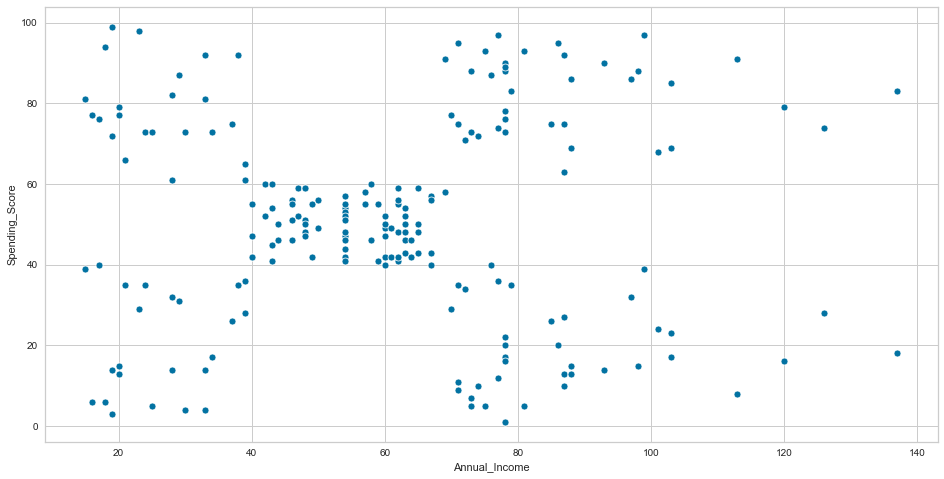

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax)
plt.show()

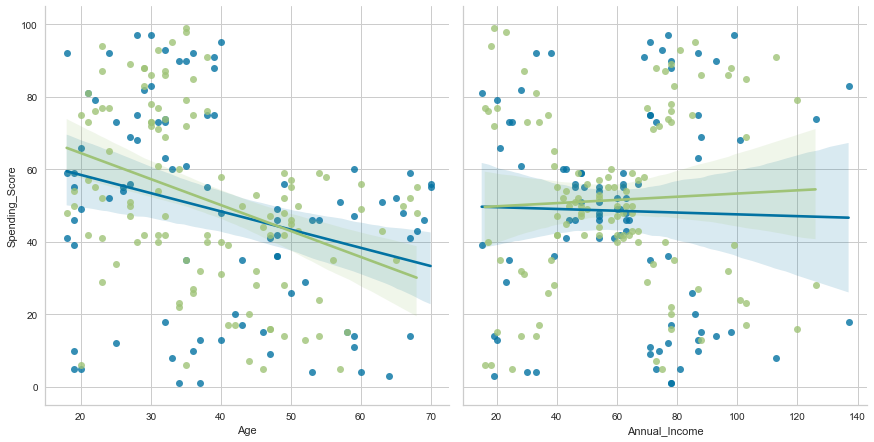

In [26]:
g = sns.PairGrid(df, y_vars=['Spending_Score'], x_vars=["Age", "Annual_Income"], height=6, hue='Gender')
g.map(sns.regplot)

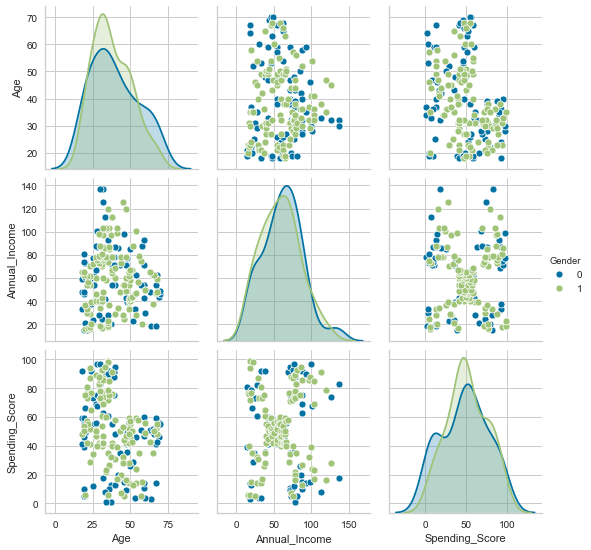

In [28]:
sns.pairplot(data=df, hue="Gender")

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

**Hopkins Test**
* Zaman ve maliyet verimliliği için, İlk olarak Veride kümeleme eğilimi var mi yok mu belirlemek için ``Hopkins Testi`` yapılır.
* Null Hypothesis(Ho) ve Alternative Hypothesis(Ha) temeline dayaniyor.
* Null Hypothesis(Ho): Uniform dagilim var, anlamli kümeleme yok.
* Alternative Hypothesis(Ha):  Veri, ratsgele veri noktalarindan oluşur. Yani Kumeleme vardir.
* [0,1] araliginda bir score verir. score, 0’a yaklaştıkça veri uniform degil,yani clusteringe meyilli
* 1’e yaklaştıkça uniform yapi var, 0.5 gecmedikce kümelenebilir olarak ifade edilir. pratikte 0.3 sinir alinir.

In [29]:
hopkins(df, df.shape[0])

0.3022306405541742

In [30]:
x1 = df[["Age", "Spending_Score"]]

In [32]:
x1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [31]:
hopkins(x1, x1.shape[0])

0.30280867361842284

**Elbow Method**
* aciklanan varyans(Sum of squared distances) ve küme sayisi(k) arasindaki ilişkiye dayanarak cozum geliştiren bir yöntem,
* yani aciklanan varyans, küme sayisinin fonksiyonu olarak çizilir, grafikte dirseğin kirildigi nokta, k nin optimal degeridir
* minimum k ile minimum hatanin alindigi optimum noktayi baz alacagiz. Keskin dususun en son bittigi yeri alacagiz.

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.4363508054543454
Silhouette Score for 6 clusters: 0.4405479018621985
Silhouette Score for 7 clusters: 0.4212938931368575
Silhouette Score for 8 clusters: 0.43310368987685466
Silhouette Score for 9 clusters: 0.41189279793283423
Silhouette Score for 10 clusters: 0.4082265556783057


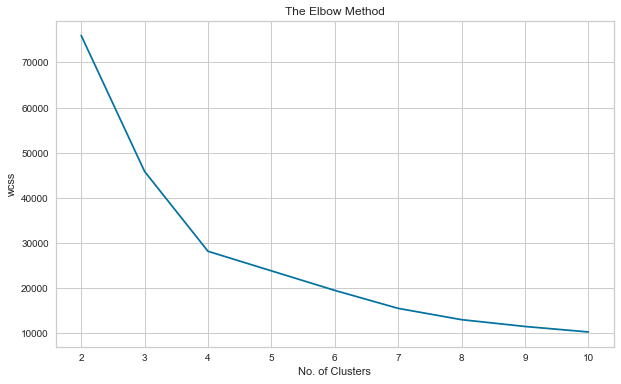

In [37]:
wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    print(f'Silhouette Score for {n} clusters: {silhouette_score(x1, kmeans.labels_)}')
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

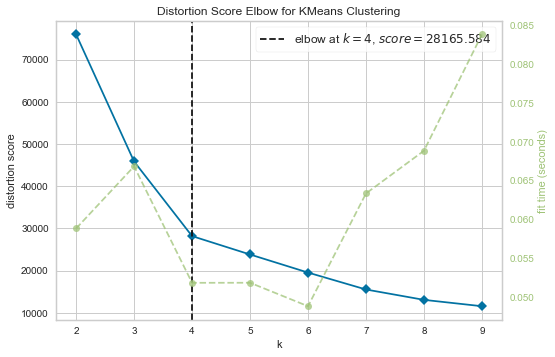

In [34]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof()

#### *iii. Apply K Means*

In [38]:
kmeans=KMeans(n_clusters=4)
y_means = kmeans.fit_predict(x1)

In [39]:
x1["cluster"] = y_means

In [40]:
x1

,Age,Spending_Score,cluster
0,19,39,1
1,21,81,2
2,20,6,3
3,23,77,2
4,31,40,1
...,...,...,...
195,35,79,2
196,45,28,3
197,32,74,2
198,32,18,3


#### *iv. Visualizing and Labeling All the Clusters*

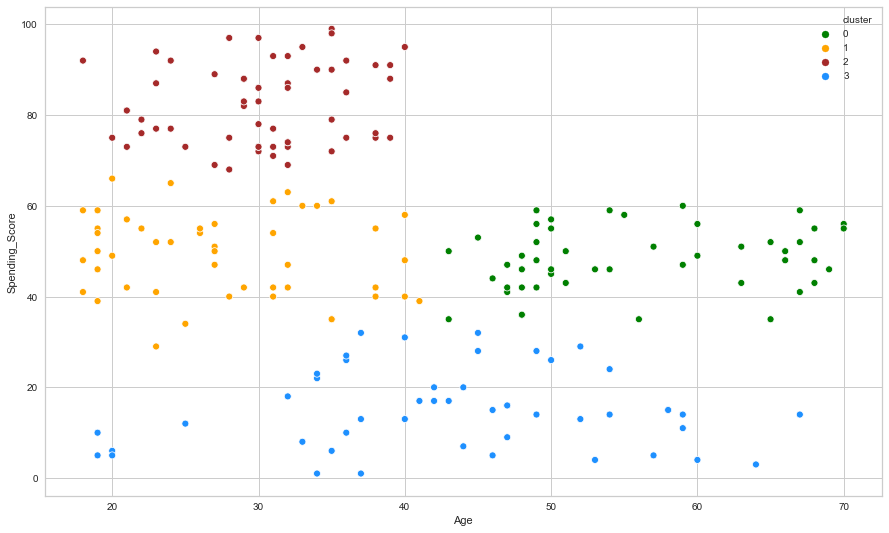

In [41]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [42]:
x2 = pd.DataFrame(df.loc[:,['Annual_Income','Spending_Score']].values,columns=['Annual_Income','Spending_Score'])

In [43]:
x2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

In [44]:
hopkins(x2, x2.shape[0])

0.28523119675559044

Silhouette Score for 2 clusters: 0.2968969162503008
Silhouette Score for 3 clusters: 0.46761358158775435
Silhouette Score for 4 clusters: 0.4931963109249047
Silhouette Score for 5 clusters: 0.553931997444648
Silhouette Score for 6 clusters: 0.5393922132561455
Silhouette Score for 7 clusters: 0.5270287298101395
Silhouette Score for 8 clusters: 0.4575689106804838
Silhouette Score for 9 clusters: 0.4565077334305076
Silhouette Score for 10 clusters: 0.449795408266166


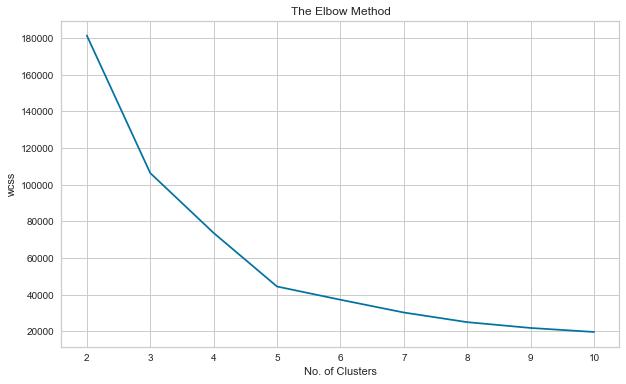

In [45]:
wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    print(f'Silhouette Score for {n} clusters: {silhouette_score(x2, kmeans.labels_)}')
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

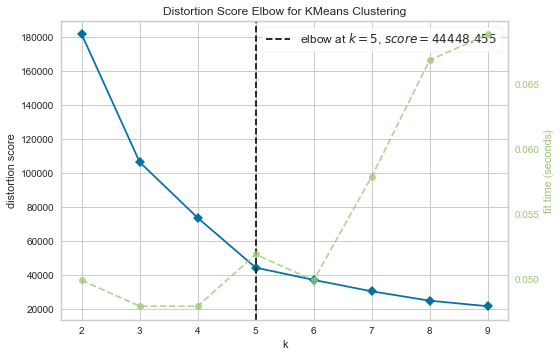

In [46]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof()

#### *iii. Apply K Means*

In [47]:
kmeansmodel=KMeans(n_clusters=5)
kmeansmodel.fit(x2)

KMeans(n_clusters=5)

In [48]:
x2["cluster"] = kmeansmodel.labels_
x2

,Annual_Income,Spending_Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


#### *iv. Visualizing and Labeling All the Clusters*

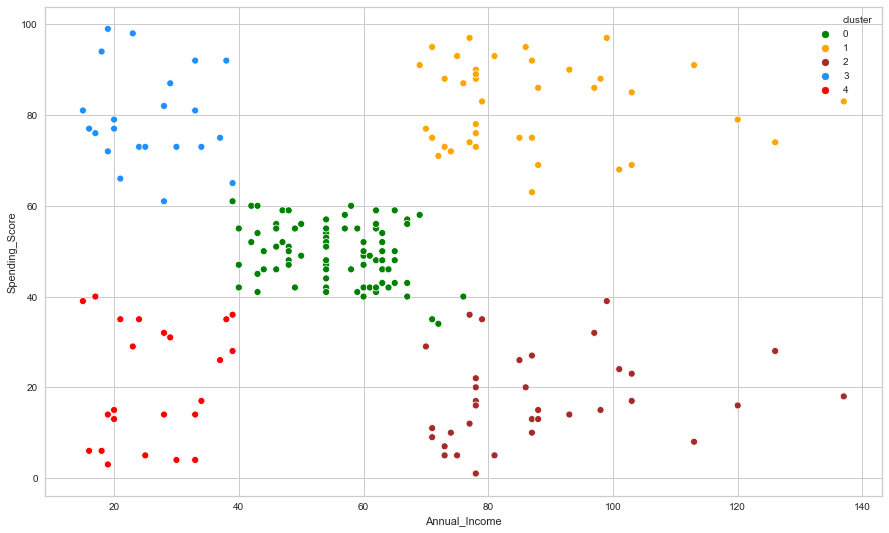

In [49]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2,palette=['green','orange','brown','dodgerblue','red'], legend='full')

In [63]:
x1.cluster.values

array([1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 2, 1, 2,
       3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 1,
       3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [64]:
x3 = pd.DataFrame(x1.cluster.values, columns = ["cluster-1"])
x3["cluster-2"] = x2.cluster

In [65]:
x3

,cluster-1,cluster-2
0,1,4
1,2,3
2,3,4
3,2,3
4,1,4
...,...,...
195,2,1
196,3,2
197,2,1
198,3,2


In [66]:
ct = pd.crosstab(x3["cluster-1"], x3["cluster-2"])
ct

cluster-2,0,1,2,3,4
cluster-1,,,,,
0,44,0,2,0,2
1,37,1,2,3,4
2,0,38,0,19,0
3,0,0,31,0,17


### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

### For x1

In [70]:
hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

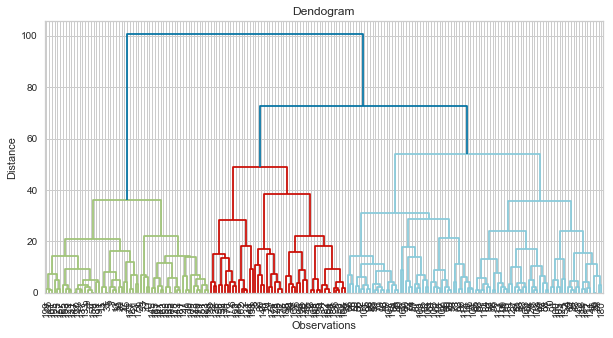

In [58]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

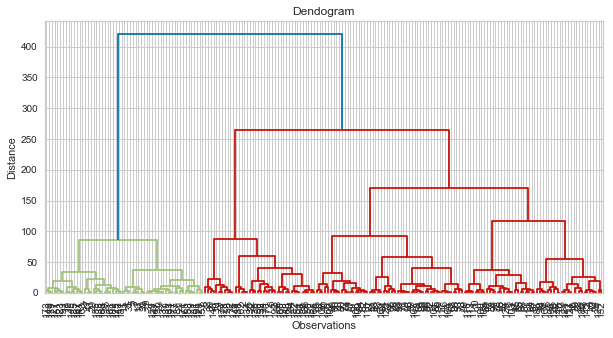

In [71]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

### For x2

In [72]:
hc_complete = linkage(x2, "complete")
hc_ward = linkage(x2, "ward")

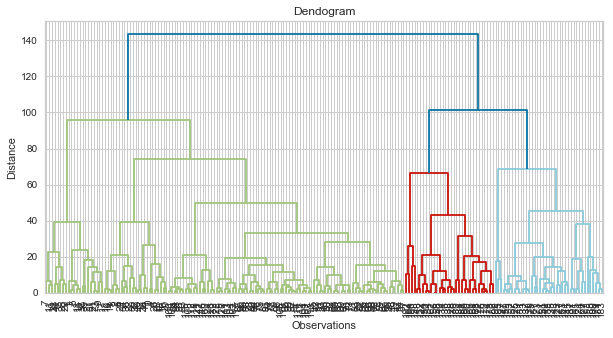

In [73]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

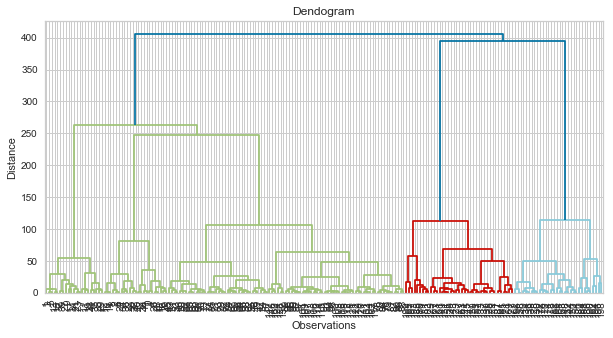

In [74]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [75]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

In [76]:
x1["cluster2"] = y_agg
x1

,Age,Spending_Score,cluster,cluster2
0,19,39,1,0
1,21,81,2,3
2,20,6,3,2
3,23,77,2,3
4,31,40,1,0
...,...,...,...,...
195,35,79,2,3
196,45,28,3,0
197,32,74,2,3
198,32,18,3,2


In [81]:
ct = pd.crosstab(x1.cluster, x1.cluster2)
ct

cluster2,0,1,2,3
cluster,,,,
0,3,45,0,0
1,39,8,0,0
2,0,0,0,57
3,8,0,40,0


In [77]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = cluster.fit_predict(x2)

In [78]:
x2["cluster2"] = y_agg2
x2

,Annual_Income,Spending_Score,cluster,cluster2
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,2,0
197,126,74,1,2
198,137,18,2,0


In [80]:
ct = pd.crosstab(x2.cluster, x2.cluster2)
ct

cluster2,0,1,2,3,4
cluster,,,,,
0,0,81,0,0,0
1,0,0,39,0,0
2,32,3,0,0,0
3,0,1,0,21,0
4,0,0,0,0,23


#### iii. *Visualizing and Labeling All the Clusters* 

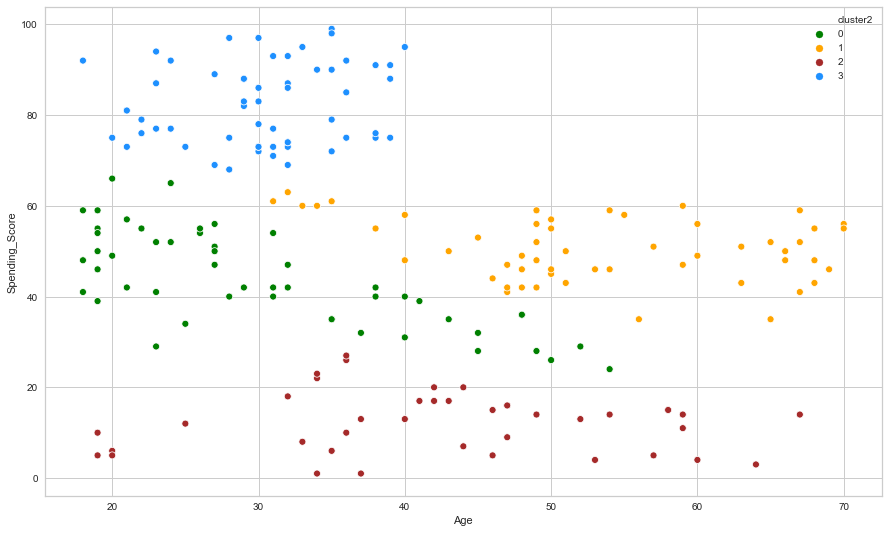

In [79]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

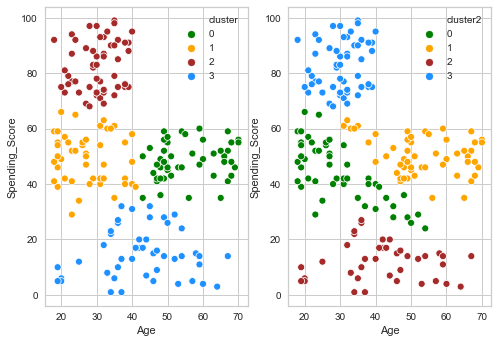

In [96]:
plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')
plt.subplot(1,2,2)
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

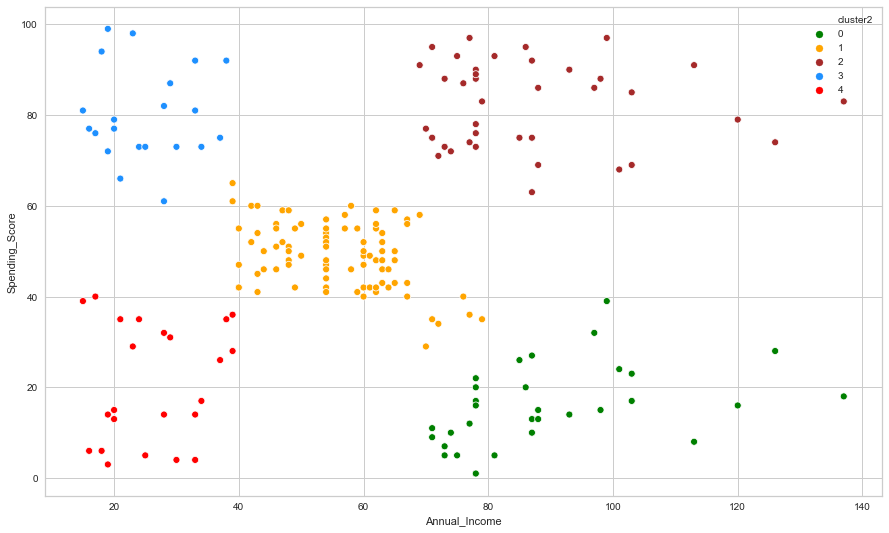

In [82]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2,palette=['green','orange','brown','dodgerblue','red'])

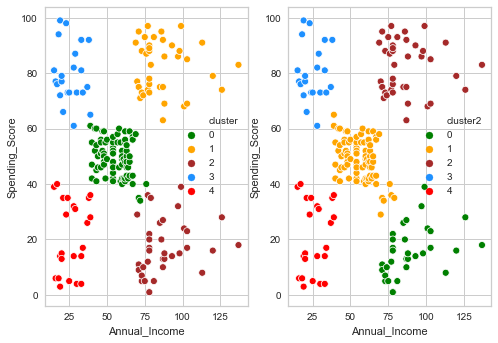

In [97]:
plt.subplot(1,2,1)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2,palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.subplot(1,2,2)
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2,palette=['green','orange','brown','dodgerblue', 'red'], legend='full')

In [91]:
df["cluster"] = y_agg2
df

,Gender,Age,Annual_Income,Spending_Score,cluster
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,0
197,0,32,126,74,2
198,0,32,137,18,0


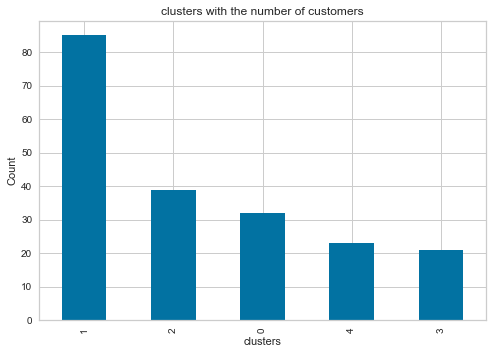

In [90]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.cluster.value_counts().plot(kind='bar')

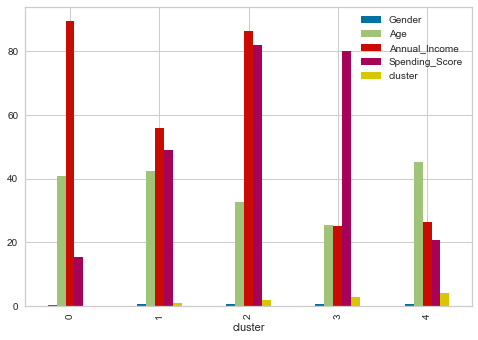

In [92]:
df.groupby(df.cluster).mean().plot(kind='bar')
plt.show()

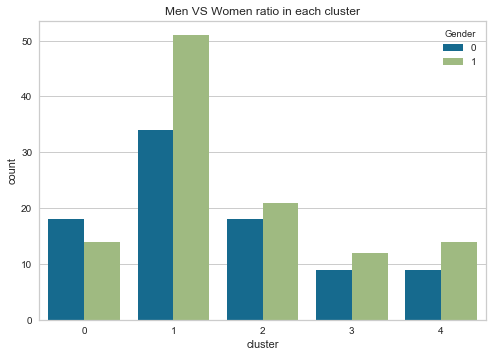

In [93]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
sns.countplot(x=df.cluster, hue=df.Gender)
plt.show()

In [99]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=5).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

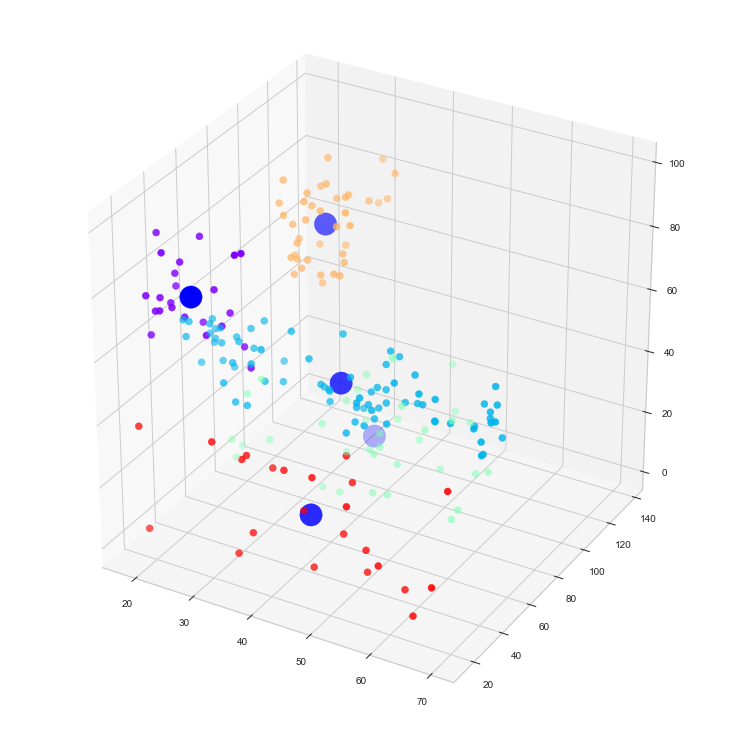

In [102]:
plt.rcParams["figure.figsize"] =(10,10)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],c = clusters, s = 50,cmap = "rainbow")
ax.scatter(centers[:,1],centers[:,2],centers[:,3],c="blue",marker="o",s = 500);

### Conclusion

1st group(Red) :Low income, low spending score

2nd group(Blue) :Low income, high spending score

3rd group(Purple) :Moderate income, moderate spending score

4th group(Brown) :High income, low spending score

5th group(Orange) :High income, high spending score

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___